In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_1.csv')

In [3]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


Eyballs - number of people who open the app <br>
Zeroes - number of people who didn't see a car

There is a NaN value in Date column - fill NaN

In [8]:
#The ffill() method replaces the NULL values with the value from the previous row
df = df.fillna(method="ffill")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [10]:
#remove whitespace in the end of columns names
df.columns = df.columns.str.lstrip() #at the begging of string
df.columns = df.columns.str.rstrip() #at the end of string

In [11]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers'],
      dtype='object')

Date with most completed trips during the two week period

In [12]:
sum_completed_trips = df.groupby('Date')['Completed Trips'].sum().reset_index()

In [13]:
sum_completed_trips

,Date,Completed Trips
0,10-Sep-12,26
1,11-Sep-12,40
2,12-Sep-12,91
3,13-Sep-12,45
4,14-Sep-12,108
5,15-Sep-12,199
6,16-Sep-12,93
7,17-Sep-12,57
8,18-Sep-12,42
9,19-Sep-12,41


In [14]:
#alternatively df.nlargest(1, 'Completed Trips ')
df_q1 = sum_completed_trips[sum_completed_trips['Completed Trips'] == sum_completed_trips['Completed Trips'].max()]

In [15]:
df_q1

,Date,Completed Trips
12,22-Sep-12,248


The highest number of completed trips within a 24 hour period <br>

In [18]:
#To use resample function create Timestamp
def create_timestamp(date, time):
    return pd.to_datetime(f'{date} {time}:00')
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

In [19]:
df.head(1)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00


In [25]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()
df_agg_twentyfour_hrs.nlargest(1, "Completed Trips")

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Timestamp,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


Hour of the day with most requests during the two week period

In [26]:
requests_per_hours = df.groupby('Time (Local)')['Requests'].sum().reset_index()

In [27]:
requests_per_hours

,Time (Local),Requests
0,0,142
1,1,96
2,2,100
3,3,35
4,4,9
5,5,14
6,6,28
7,7,22
8,8,29
9,9,26


In [28]:
df_q3 = requests_per_hours[requests_per_hours['Requests'] == requests_per_hours['Requests'].max()]

In [29]:
df_q3

,Time (Local),Requests
23,23,184


Percentages of all zeroes (number of people who didn't see a car) during the 2 week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)

In [30]:
#First step - get the day of the week
df['Date'] = df['Date'].apply(pd.to_datetime)

In [31]:
df['day_of_week'] = df['Date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

In [32]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon


In [33]:
df_2 = df[df['day_of_week'].isin(['Fri','Sat','Sun'])]

In [34]:
df_2

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week
89,2012-09-14,0,10,1,3,4,3,2012-09-14 00:00:00,Fri
90,2012-09-14,1,10,9,2,5,2,2012-09-14 01:00:00,Fri
91,2012-09-14,2,5,3,1,3,1,2012-09-14 02:00:00,Fri
92,2012-09-14,3,3,3,0,1,0,2012-09-14 03:00:00,Fri
93,2012-09-14,4,1,1,0,1,0,2012-09-14 04:00:00,Fri
...,...,...,...,...,...,...,...,...,...
324,2012-09-23,19,32,9,4,6,11,2012-09-23 19:00:00,Sun
325,2012-09-23,20,29,6,3,3,7,2012-09-23 20:00:00,Sun
326,2012-09-23,21,24,6,3,4,5,2012-09-23 21:00:00,Sun
327,2012-09-23,22,17,2,2,2,6,2012-09-23 22:00:00,Sun


In [35]:
#Filter specific day and hour
#We need: Friday from 17-23
#All Saturday
#Sunday from 0-14 

In [36]:
df['Time (Local)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [37]:
friday = df[(df['day_of_week'] == 'Fri') & (df['Time (Local)'] >= 17)]
saturday = df[(df['day_of_week'] == 'Sat')]
sunday  = df[(df['day_of_week'] == 'Sun') & (df['Time (Local)'] < 3)]

In [38]:
weekend_day = pd.concat([friday, saturday, sunday], axis=0)

In [39]:
weekend_day

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week
106,2012-09-14,17,34,4,3,5,13,2012-09-14 17:00:00,Fri
107,2012-09-14,18,40,2,8,9,14,2012-09-14 18:00:00,Fri
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00,Fri
109,2012-09-14,20,38,4,8,9,14,2012-09-14 20:00:00,Fri
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00,Fri
...,...,...,...,...,...,...,...,...,...
138,2012-09-16,1,38,3,17,17,15,2012-09-16 01:00:00,Sun
139,2012-09-16,2,29,2,13,15,12,2012-09-16 02:00:00,Sun
305,2012-09-23,0,62,25,23,32,18,2012-09-23 00:00:00,Sun
306,2012-09-23,1,38,1,15,23,18,2012-09-23 01:00:00,Sun


In [40]:
#Percentages of all zeroes
weekend_day['Zeroes'].sum()/df['Zeroes'].sum()

0.44856543037088875

Weighted average ratio of completed trips per driver during the two week period

In [41]:
#calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips'] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week,completed_trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon,0.363636
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2012-09-24 02:00:00,Mon,NaN
332,2012-09-24,3,3,3,0,1,0,2012-09-24 03:00:00,Mon,NaN
333,2012-09-24,4,1,1,0,0,0,2012-09-24 04:00:00,Mon,NaN
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,Mon,0.333333


In [42]:
#drop rows with NAN
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
#calculate weighted average by giving weight as day's completed ratio all completed trip
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'] * (dataset_without_zero_unique_driver['Completed Trips'] / dataset_without_zero_unique_driver['Completed Trips'].sum())) 
weighted_average_ratio

0.002788813372084982

The busiest 8 consecutive hours over the two week period in terms of unique requests if new shift starts in every 8 hours. Drivers work same shift each day.

In [43]:
df_agg_eight_hrs = df.set_index('Timestamp').resample('8H').sum()

In [34]:
df.head(9)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week,completed_trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon,0.363636
5,2012-09-10,12,12,0,2,2,11,2012-09-10 12:00:00,Mon,0.181818
6,2012-09-10,13,9,1,0,0,9,2012-09-10 13:00:00,Mon,0.000000
7,2012-09-10,14,12,1,0,0,9,2012-09-10 14:00:00,Mon,0.000000
8,2012-09-10,15,11,2,1,2,7,2012-09-10 15:00:00,Mon,0.142857


In [45]:
time_format = "%Y/%m/%d %H:%M"
df_agg_eight_hrs['Time Interval']  = df_agg_eight_hrs.index.strftime(time_format) +  "-" + (df_agg_eight_hrs.index + pd.Timedelta('8 hours')).strftime(time_format)
df_agg_eight_hrs

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0.222222,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,92,78,10,9,11,89,0.831169,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,156,106,16,15,21,40,3.047619,2012/09/10 16:00-2012/09/11 00:00
2012-09-11 00:00:00,28,33,12,5,7,17,1.400000,2012/09/11 00:00-2012/09/11 08:00
2012-09-11 08:00:00,92,108,11,5,6,58,0.690079,2012/09/11 08:00-2012/09/11 16:00
2012-09-11 16:00:00,156,173,41,30,39,57,4.145887,2012/09/11 16:00-2012/09/12 00:00
2012-09-12 00:00:00,28,39,16,6,13,12,2.000000,2012/09/12 00:00-2012/09/12 08:00
2012-09-12 08:00:00,92,213,15,52,60,113,3.766558,2012/09/12 08:00-2012/09/12 16:00
2012-09-12 16:00:00,156,171,24,33,41,76,3.704240,2012/09/12 16:00-2012/09/13 00:00


In [46]:
df_agg_eight_hrs.nlargest(1, 'Requests')['Time Interval']

Timestamp
2012-09-21 16:00:00    2012/09/21 16:00-2012/09/22 00:00
Freq: 8H, Name: Time Interval, dtype: object

Does driver supply always increases when demand increases ?

In [47]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week,completed_trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon,0.363636


In [48]:
df_2 = df.set_index('Timestamp')

In [49]:
df_2

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,completed_trip_ratio_per_driver
Timestamp,,,,,,,,,
2012-09-10 07:00:00,2012-09-10,7,5,0,2,2,9,Mon,0.222222
2012-09-10 08:00:00,2012-09-10,8,6,0,2,2,14,Mon,0.142857
2012-09-10 09:00:00,2012-09-10,9,8,3,0,0,14,Mon,0.000000
2012-09-10 10:00:00,2012-09-10,10,9,2,0,1,14,Mon,0.000000
2012-09-10 11:00:00,2012-09-10,11,11,1,4,4,11,Mon,0.363636
...,...,...,...,...,...,...,...,...,...
2012-09-24 02:00:00,2012-09-24,2,3,3,0,2,0,Mon,NaN
2012-09-24 03:00:00,2012-09-24,3,3,3,0,1,0,Mon,NaN
2012-09-24 04:00:00,2012-09-24,4,1,1,0,0,0,Mon,NaN


<AxesSubplot:>

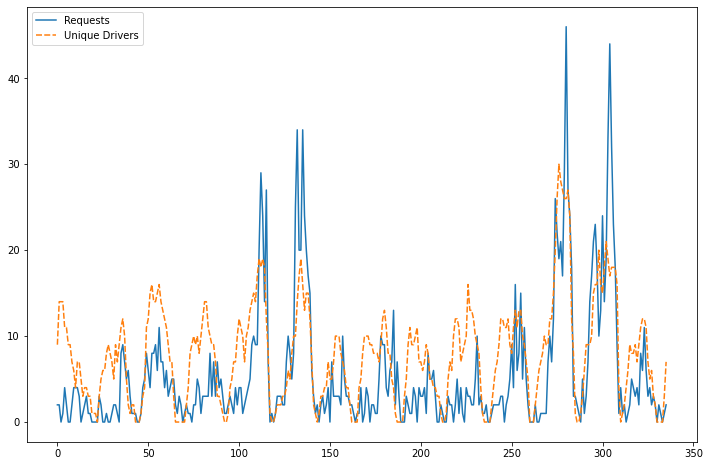

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Requests', 'Unique Drivers', 'Timestamp']])

In [51]:
#create empty dataframe with only Timestamp
difference_df = pd.DataFrame(df['Timestamp'])
#calculate the request difference to catch request increases
difference_df['reguest_diff'] = df['Requests'].shift(-1) - df['Requests']
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']

In [52]:
difference_df

,Timestamp,reguest_diff,supply_diff
0,2012-09-10 07:00:00,0.0,5.0
1,2012-09-10 08:00:00,-2.0,0.0
2,2012-09-10 09:00:00,1.0,0.0
3,2012-09-10 10:00:00,3.0,-3.0
4,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
331,2012-09-24 02:00:00,-1.0,0.0
332,2012-09-24 03:00:00,-1.0,0.0
333,2012-09-24 04:00:00,1.0,3.0
334,2012-09-24 05:00:00,1.0,4.0


72 hours period with the highest ratio of Zeroes to Eyeballs

In [43]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week,completed_trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon,0.363636


In [62]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_seventytwo_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()

In [63]:
df_agg_seventytwo_hrs['ratio_zeroes_eyeballs'] = df_agg_seventytwo_hrs['Zeroes']/df_agg_seventytwo_hrs['Eyeballs']

In [64]:
time_format = "%Y/%m/%d %H:%M"
df_agg_seventytwo_hrs['Time Interval']  = df_agg_seventytwo_hrs.index.strftime(time_format) +  "-" + (df_agg_seventytwo_hrs.index + pd.Timedelta('3 days')).strftime(time_format)
df_agg_seventytwo_hrs

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,ratio_zeroes_eyeballs,Time Interval
Timestamp,,,,,,,,,
2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,20.807776,0.179916,2012/09/10 07:00-2012/09/13 07:00
2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,20.835553,0.180021,2012/09/10 08:00-2012/09/13 08:00
2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,20.817696,0.180498,2012/09/10 09:00-2012/09/13 09:00
2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,20.817696,0.180412,2012/09/10 10:00-2012/09/13 10:00
2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,21.017696,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,0.619048,0.500000,2012/09/24 02:00-2012/09/27 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,0.619048,0.411765,2012/09/24 03:00-2012/09/27 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,0.619048,0.285714,2012/09/24 04:00-2012/09/27 04:00


In [65]:
df_agg_seventytwo_hrs.nlargest(1, 'ratio_zeroes_eyeballs')['Time Interval']

Timestamp
2012-09-24 01:00:00    2012/09/24 01:00-2012/09/27 01:00
Name: Time Interval, dtype: object

When put extra 5 drivers 

In [66]:
df_agg_time = df.groupby('Time (Local)').sum().reset_index()

In [67]:
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs'] / df_agg_time['Unique Drivers'] 
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,eyeball_to_driver_ratio
23,23,488,193,126,184,119,11.269306,4.10084


Which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) <br>

In [68]:
# find min supply and demand per day
df_min_supply_per_day = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = df.groupby(['Date'])['Requests'].min().reset_index().rename(columns={'Requests':'min_demand_per_day'})

supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on = 'Date')
supply_demand 

,Date,min_supply_per_day,min_demand_per_day
0,2012-09-10,3,0
1,2012-09-11,0,0
2,2012-09-12,0,0
3,2012-09-13,0,0
4,2012-09-14,0,1
5,2012-09-15,0,0
6,2012-09-16,0,0
7,2012-09-17,0,0
8,2012-09-18,0,0
9,2012-09-19,0,0


In [69]:
#merge to found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(df, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,day_of_week,completed_trip_ratio_per_driver,min_supply_per_day,min_demand_per_day
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,Mon,0.222222,3,0
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,Mon,0.142857,3,0
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,Mon,0.000000,3,0
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,Mon,0.000000,3,0
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,Mon,0.363636,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2012-09-24 02:00:00,Mon,NaN,0,0
332,2012-09-24,3,3,3,0,1,0,2012-09-24 03:00:00,Mon,NaN,0,0
333,2012-09-24,4,1,1,0,0,0,2012-09-24 04:00:00,Mon,NaN,0,0
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,Mon,0.333333,0,0


In [71]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) & 
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests'])]['Time (Local)'].mode()
min_point

0    4
dtype: int64

In [72]:
# minimum hour is 4 am
min_point[0]

4